#             I. Stat générales sur les séries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import warnings
import seaborn as sns

In [2]:
alternative_data_raw = pd.read_excel('EnsaeAlternativeTimeSeries.xlsx', sheet_name='Alternative Asset', index_col=0)

In [3]:
def tweak_alternative_data(df_):
    return (df_.assign(**{col + '_%': df_[col].pct_change(fill_method = None) for col in df_.columns}) #Adding the returs
            .set_index(pd.to_datetime(df_.index))
            .resample('QE')
            .last() #Changing the index format to datetime
            .rename(lambda c: c.replace(' ','_'), axis = 1)
            .drop(columns = ['Infrastructure_Equity_Listed_-_USD_Unhedged_%','Infrastructure_Equity_Listed_-_USD_Unhedged'])) # Replacing the spaces by _ in the names


alternative_data = tweak_alternative_data(alternative_data_raw)
alternative_return = alternative_data.iloc[:,8:]

/tmp/ipykernel_302167/1179806071.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  .set_index(pd.to_datetime(df_.index))


In [4]:
alternative_return.head()

,Commodity_-_USD_Unhedged_%,Global_Property_USD_Unhedged_%,Hedge_Fund_DJ_-_USD_Unhedged_%,Infrastructure_Debt_-_USD_Unhedged_%,Infrastructure_Equity_USD_Unhedged_%,Nature_Capital_-_USD_Hedged_%,Private_Equity_USD_Unhedged_%,UK_Property_Direct_-_USD_Unhedged_%
QUARTER,,,,,,,,
1993-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-03-31,NaN,NaN,NaN,NaN,NaN,NaN,0.101506,NaN
1994-06-30,NaN,NaN,NaN,NaN,NaN,NaN,0.029835,NaN
1994-09-30,NaN,NaN,NaN,NaN,NaN,NaN,0.036681,NaN
1994-12-31,NaN,NaN,NaN,NaN,NaN,NaN,0.001613,NaN


## Test de stationarité sur les rendements:

Dickey Fuller : 

In [9]:
unit_test = {name: (adfuller(alternative_return[name].dropna())[0], adfuller(alternative_return[name].dropna())[1]) 
       for name in alternative_return.columns}

(pd.DataFrame(unit_test, index = ['value','p-value']).T.style.format(precision = 2)
.background_gradient(cmap = 'RdYlGn'))

,value,p-value
Commodity_-_USD_Unhedged_%,-8.82,0.00
Global_Property_USD_Unhedged_%,-8.58,0.00
Hedge_Fund_DJ_-_USD_Unhedged_%,-8.99,0.00
Infrastructure_Debt_-_USD_Unhedged_%,-7.14,0.00
Infrastructure_Equity_USD_Unhedged_%,-8.06,0.00
Nature_Capital_-_USD_Hedged_%,-5.63,0.00
Private_Equity_USD_Unhedged_%,-9.30,0.00
UK_Property_Direct_-_USD_Unhedged_%,-8.59,0.00


Test KPSS :

In [12]:
unit_test = {name: (kpss(alternative_data[name].dropna())[0], kpss(alternative_data[name].dropna())[1]) 
       for name in alternative_data.iloc[:,10:].columns}

(pd.DataFrame(unit_test, index = ['value','p-value']).T.style.format(precision = 2)
.background_gradient(cmap = 'RdYlGn'))

/tmp/ipykernel_302167/3619417823.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  unit_test = {name: (kpss(alternative_data[name].dropna())[0], kpss(alternative_data[name].dropna())[1])
/tmp/ipykernel_302167/3619417823.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  unit_test = {name: (kpss(alternative_data[name].dropna())[0], kpss(alternative_data[name].dropna())[1])
/tmp/ipykernel_302167/3619417823.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  unit_test = {name: (kpss(alternative_data[name].dropna())[0], kpss(alternative_data[name].dropna())[1])
/tmp/ipykernel_302167/3619417823.py:1: InterpolationWarning: The

,value,p-value
Hedge_Fund_DJ_-_USD_Unhedged_%,0.11,0.10
Infrastructure_Debt_-_USD_Unhedged_%,0.39,0.08
Infrastructure_Equity_USD_Unhedged_%,0.08,0.10
Nature_Capital_-_USD_Hedged_%,0.42,0.07
Private_Equity_USD_Unhedged_%,0.04,0.10
UK_Property_Direct_-_USD_Unhedged_%,0.08,0.10


# II. Stats sur global property

In [7]:
global_returns = alternative_return['Global_Property_USD_Unhedged_%'].dropna()

In [8]:
global_returns

QUARTER
1999-06-30    0.097809
1999-09-30   -0.063888
1999-12-31    0.062225
2000-03-31   -0.024800
2000-06-30    0.036095
                ...   
2022-09-30   -0.113868
2022-12-31    0.071069
2023-03-31    0.010359
2023-06-30    0.005429
2023-09-30   -0.014102
Freq: QE-DEC, Name: Global_Property_USD_Unhedged_%, Length: 98, dtype: float64

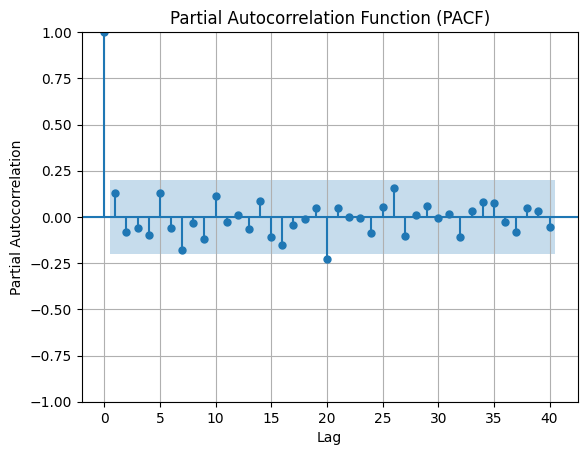

In [19]:
plot_pacf(global_returns, lags = 40)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.grid()
plt.show()

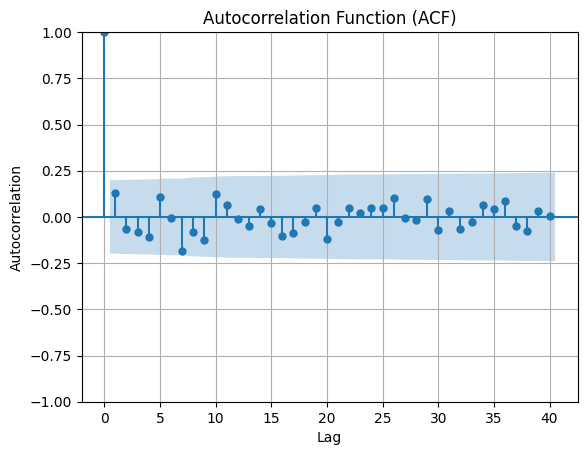

In [21]:
plot_acf(global_returns, lags = 40)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.grid()
plt.show()